In [1]:
import joblib
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from cplAE_TE.utils.preproc_helpers import get_spc_names_v2, standardize_E, scale_E_scores

def set_raw_data_paths():
    pth={}
    base_path = '/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/'
    pth['T_dat'] = base_path + 'inh_T_data.csv'
    pth['T_ann'] = base_path + 'inh_T_annotations.csv'
    pth['E_dat'] = base_path + 'inh_Merged_Ephys_features.csv'
    pth['gene_set'] = base_path + 'good_genes_beta_score.csv'
    pth['specimen_ids'] = base_path + 'inh_spec_ids.txt'
    return pth

In [2]:
pth = set_raw_data_paths()
E_data = pd.read_csv(pth['E_dat'])
T_data = pd.read_csv(pth['T_dat'])
annotation = pd.read_csv(pth['T_ann'])

In [3]:
E_data.head()

,sample_id,first_ap_dv_0,first_ap_dv_1,first_ap_dv_2,first_ap_dv_3,first_ap_dv_4,first_ap_dv_5,first_ap_dv_6,first_ap_dv_7,first_ap_dv_8,...,avg_rate_0_long_square,input_resistance,latency_0_long_square,rheobase_i,sag_measured_at,sag_nearest_minus_100,short_square_current,stimulus_amplitude_0_long_square,tau,v_baseline
0,P1S4_190617_001_A01,-0.919756,0.700900,-0.237131,0.196895,-0.065753,0.131430,-0.098393,-0.088334,-0.049728,...,-0.355280,0.410741,-0.311039,-0.346733,-0.806872,0.369393,-0.295386,-0.346733,-0.234058,-0.137481
1,P2S4_180813_052_A01,-0.475642,0.238063,-0.083658,0.042742,-0.221290,0.042716,0.078785,0.036728,0.012847,...,1.249007,0.003561,-0.594176,0.402432,0.782729,0.963700,-0.140041,0.402432,-0.589063,0.052466
2,P9S4_171024_408_A01,-0.988633,0.299940,0.258093,-0.170383,0.222431,-0.008273,0.034644,0.156483,-0.020396,...,-0.355280,-0.944802,-0.520634,1.354942,1.753238,0.781863,0.740249,1.354942,-0.895508,0.750791
3,PAS4_180123_452_A01,-0.076746,-0.131319,-0.058069,-0.123293,-0.366513,0.280751,0.242099,0.188966,0.067651,...,1.730293,-0.635937,-0.497126,1.247918,0.459725,1.956468,0.377777,1.247918,-0.886903,0.207751
4,PAS4_190513_452_A01,-0.304653,-0.181313,-0.149711,0.004489,-0.080304,0.061383,-0.109638,-0.056269,0.097680,...,-0.355280,-0.493712,-0.417806,-0.239710,-0.757523,1.827259,0.170650,-0.239710,-0.598469,-1.167281


In [4]:
T_data.head()

,sample_id,Lhx6,Gad2,Slc32a1,Neurod2,Slc6a1,Gad1,Adarb2,Sv2b,Nrn1,...,Adrb1,Chst1,Trps1,2610100L16Rik,Gnaz,Pth2r,Ier5l,Cmya5,Coro2a,Spsb4
0,P1S4_170807_003_A01,0.0,0.00000,0.0,3.933493,0.000000,0.0,0.000000,6.671520,5.935189,...,4.059745,2.063620,4.201674,0.000000,4.007576,0.0,0.000000,0.000000,1.930414,0.0
1,P1S4_190214_003_A01,0.0,0.00000,0.0,3.314892,4.151198,0.0,0.000000,5.927228,4.655706,...,2.348631,4.836442,3.083591,0.000000,3.684671,0.0,0.666352,3.166779,1.566215,0.0
2,P1S4_190624_004_A01,0.0,1.09609,0.0,4.450606,0.000000,0.0,0.000000,5.575958,4.427076,...,3.824938,4.611372,4.518044,5.489291,3.174426,0.0,1.788606,0.000000,0.000000,0.0
3,P1S4_190725_002_A01,0.0,0.00000,0.0,4.127892,0.000000,0.0,0.654902,5.706064,5.200518,...,4.567160,1.547524,4.365595,4.279738,2.970368,0.0,2.759964,2.128189,3.257087,0.0
4,P1S4_190812_002_A01,0.0,0.00000,0.0,4.668216,4.640049,0.0,0.000000,5.554353,6.490263,...,2.184749,4.355581,4.845876,3.318664,3.993544,0.0,0.000000,0.000000,3.747483,0.0


In [5]:
annotation.head()

,spec_id_label,sample_id,Tree_first_cl_id,Tree_first_cl_label,Tree_first_cl_color,Tree_call_label
0,606790451,P1S4_170807_003_A01,2.0,L2/3 IT VISp Rrad,#D9F077,Core
1,823231829,P1S4_190214_003_A01,2.0,L2/3 IT VISp Rrad,#D9F077,Core
2,893406540,P1S4_190624_004_A01,2.0,L2/3 IT VISp Rrad,#D9F077,Core
3,912008949,P1S4_190725_002_A01,2.0,L2/3 IT VISp Rrad,#D9F077,Core
4,921685533,P1S4_190812_002_A01,2.0,L2/3 IT VISp Rrad,#D9F077,Core


In [6]:
# Put all of them in the same order by sample_id
all_merged = annotation.merge(E_data.merge(T_data, on="sample_id"), on="sample_id")

#separate them 
E_data = all_merged[E_data.columns]
T_data = all_merged[T_data.columns]
annotation = all_merged[annotation.columns]

In [8]:
E_data.merge(T_data, on="sample_id")

,first_ap_dv_0,first_ap_dv_1,first_ap_dv_2,first_ap_dv_3,first_ap_dv_4,first_ap_dv_5,first_ap_dv_6,first_ap_dv_7,first_ap_dv_8,first_ap_dv_9,...,Adrb1,Chst1,Trps1,2610100L16Rik,Gnaz,Pth2r,Ier5l,Cmya5,Coro2a,Spsb4


In [7]:
model_input_mat = {}
model_input_mat["E_dat"] = np.array(E_data.drop("sample_id", axis=1))
model_input_mat["T_dat"] = np.array(T_data.drop("sample_id", axis=1))
model_input_mat["sample_id"] = np.array(all_merged.sample_id)
model_input_mat["cluster_id"] = np.array(all_merged.Tree_first_cl_id)
model_input_mat["cluster_color"] = np.array(all_merged.Tree_first_cl_color)
model_input_mat["cluster"] = np.array(all_merged.Tree_first_cl_label)

This amount of cells are missing all E_data:

In [8]:
model_input_mat["E_dat"].shape[0] - model_input_mat["E_dat"][~np.isnan(model_input_mat["E_dat"]).all(axis=1)].shape[0] 

0

This amount of cells are missing some E_data:

In [9]:
model_input_mat["E_dat"].shape[0] - model_input_mat["E_dat"][~np.isnan(model_input_mat["E_dat"]).any(axis=1)].shape[0] 

3

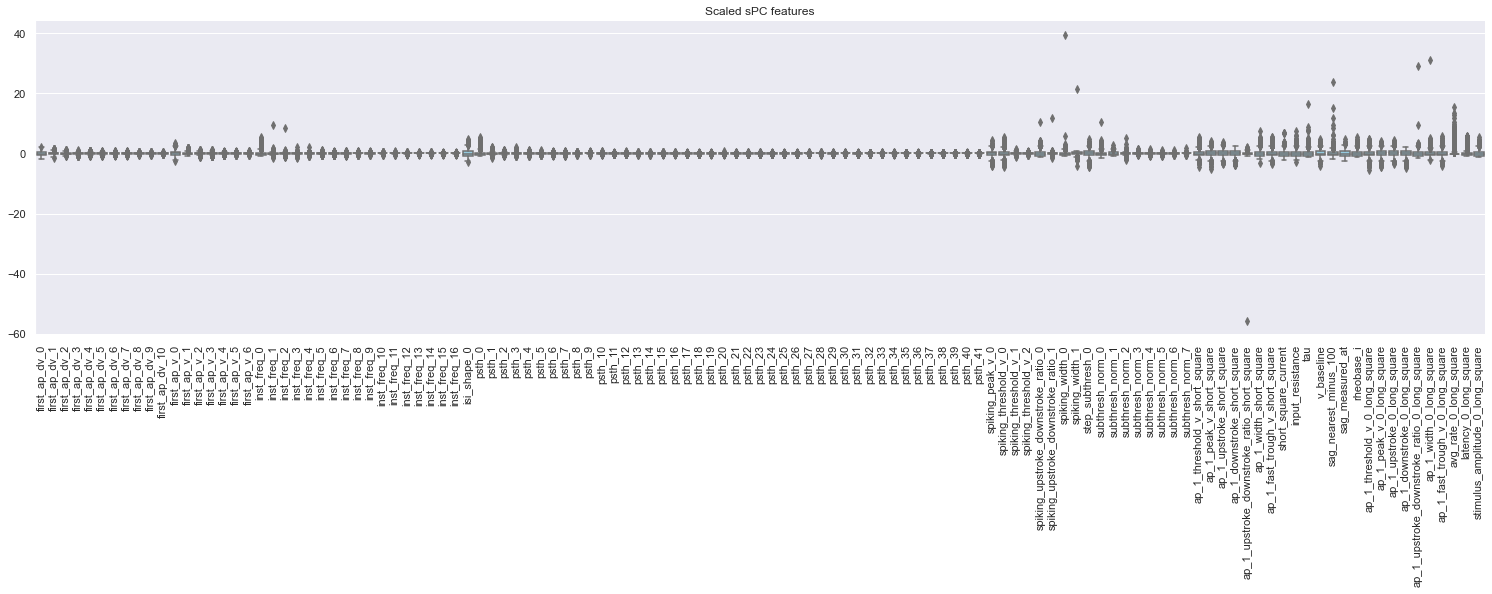

In [10]:
f = E_data
df = f.melt(value_vars=f[[c for c in f.columns if c != "sample_id"]])
sns.catplot(x="variable", y="value",kind='box', data=df, palette=sns.color_palette(["skyblue"]),aspect=4.4)
ax = plt.gca()
ax.set(**{'title':'Scaled sPC features','xlabel':'','ylabel':''})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [11]:
E_data.head()

,sample_id,first_ap_dv_0,first_ap_dv_1,first_ap_dv_2,first_ap_dv_3,first_ap_dv_4,first_ap_dv_5,first_ap_dv_6,first_ap_dv_7,first_ap_dv_8,...,ap_1_threshold_v_0_long_square,ap_1_peak_v_0_long_square,ap_1_upstroke_0_long_square,ap_1_downstroke_0_long_square,ap_1_upstroke_downstroke_ratio_0_long_square,ap_1_width_0_long_square,ap_1_fast_trough_v_0_long_square,avg_rate_0_long_square,latency_0_long_square,stimulus_amplitude_0_long_square
0,P1S4_190617_001_A01,-0.919756,0.700900,-0.237131,0.196895,-0.065753,0.131430,-0.098393,-0.088334,-0.049728,...,-0.344641,-0.528024,-1.470833,1.469831,1.303842,2.468122,0.327861,-0.355280,-0.311039,-0.346733
1,P2S4_180813_052_A01,-0.475642,0.238063,-0.083658,0.042742,-0.221290,0.042716,0.078785,0.036728,0.012847,...,0.813689,-0.384251,-1.043224,1.196770,0.843056,0.990155,0.984630,1.249007,-0.594176,0.402432
2,P9S4_171024_408_A01,-0.988633,0.299940,0.258093,-0.170383,0.222431,-0.008273,0.034644,0.156483,-0.020396,...,1.119101,0.806851,-0.807250,0.872659,0.291589,0.398968,1.837500,-0.355280,-0.520634,1.354942
3,PAS4_180123_452_A01,-0.076746,-0.131319,-0.058069,-0.123293,-0.366513,0.280751,0.242099,0.188966,0.067651,...,0.634912,0.204481,-0.393696,1.131726,1.376209,0.916256,0.911937,1.730293,-0.497126,1.247918
4,PAS4_190513_452_A01,-0.304653,-0.181313,-0.149711,0.004489,-0.080304,0.061383,-0.109638,-0.056269,0.097680,...,-0.801826,-0.403572,-0.105352,0.796324,0.749050,0.251171,0.083579,-0.355280,-0.417806,-0.239710


In [12]:
sio.savemat("//Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/proc/inh_model_input_mat.mat", model_input_mat)

In [13]:
# sio.loadmat("/Users/fahimehb/Documents/git-workspace/coupledAE-patchseq/data/inh_model_input_mat.mat")

In [16]:
model_input_mat["T_dat"].shape

(3793, 1252)